In [1]:
import pandas as pd # panda's nickname is pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from  sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plot
from sklearn import linear_model
from IPython.display import Image 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
import sklearn.preprocessing as prep
import pydotplus 
import math
from sklearn.linear_model import RidgeCV
import sklearn.linear_model as linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
communities_crime_df = pd.read_csv('communities-crime-clean.csv')

# Sanity test we have good data
communities_crime_df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,...,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,...,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,...,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,...,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,...,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def setHighCrime(df):
    '''Function to set value of highCrime depending on ViolentCrimesPerPop'''
    if df['ViolentCrimesPerPop'] > 0.1:
        return True
    else:
        return False
    
# Adding a new field "highCrime"
communities_crime_df['highCrime'] = communities_crime_df.apply(setHighCrime, axis=1)

# Calculating the percentage of positive and negative instances in the dataset
percentage_intances = communities_crime_df.groupby('highCrime').size() * 100 / len(communities_crime_df)
print(percentage_intances)
print("------------------")
print("Percentage Positive Instance = {}\nPercentage Negative Instance = {} ".format(percentage_intances[1],percentage_intances[0]))

highCrime
False    37.280482
True     62.719518
dtype: float64
------------------
Percentage Positive Instance = 62.719518314099346
Percentage Negative Instance = 37.280481685900654 


In [ ]:
X = communities_crime_df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).drop('highCrime', axis=1)
features = list(X.columns)
y = communities_crime_df["highCrime"]


# First, we tried by not defining the max depth
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)
predicted = dt_clf.predict(X[features])
recall_score = metrics.recall_score(communities_crime_df['highCrime'], predicted)
precision_score = metrics.precision_score(communities_crime_df['highCrime'], predicted)
accuracy_score = metrics.accuracy_score(communities_crime_df['highCrime'], predicted)
print("Training Accuracy = {} Precision = {} Recall = {}".format(accuracy_score,precision_score,recall_score))

Training Accuracy = 1.0 Precision = 1.0 Recall = 1.0


In [ ]:
for depth in range(1,10):
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    if tree_clf.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_clf, X, y,scoring='accuracy', cv=150, n_jobs=1))
    print("Depth: %i Accuracy: %.3f" % (depth,score))

Depth: 1 Accuracy: 0.795
Depth: 2 Accuracy: 0.783
Depth: 3 Accuracy: 0.830
Depth: 4 Accuracy: 0.796
Depth: 5 Accuracy: 0.781
Depth: 6 Accuracy: 0.784
Depth: 7 Accuracy: 0.772
Depth: 8 Accuracy: 0.773
Depth: 9 Accuracy: 0.774


In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X,y)
#Predicting 
pred_dt= dt_clf.predict(X)
dt_accuracy= metrics.accuracy_score(communities_crime_df['highCrime'], pred_dt)
dt_precision= metrics.precision_score(communities_crime_df['highCrime'], pred_dt)
dt_recall= metrics.recall_score(communities_crime_df['highCrime'], pred_dt)
print("Accuracy for DT =",dt_accuracy)
print("Precision for DT =",dt_precision)
print("Recall for DT =",dt_precision)

Accuracy for DT = 0.8359257400903161
Precision for DT = 0.9002601908065915
Recall for DT = 0.9002601908065915


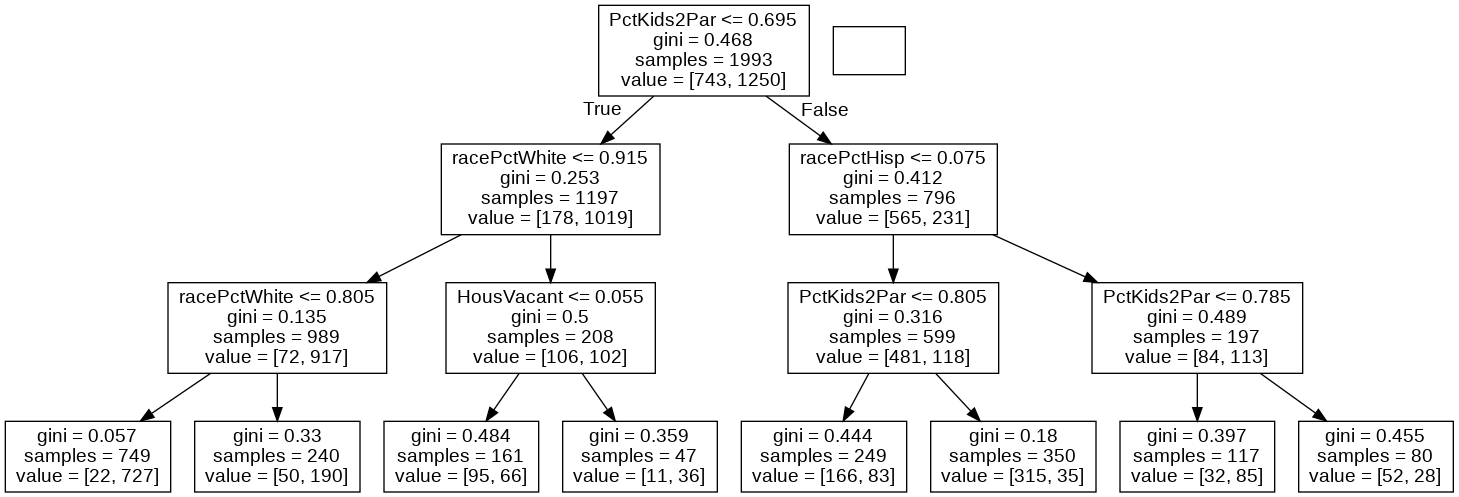

In [ ]:
dot_data = tree.export_graphviz(dt_clf, out_file=None,feature_names=list(X))

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [ ]:
importances=dt_clf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
# We have taken the top 5 feature 
print("The main features used for classification")
print(X.columns[indices[:5]])
print("Top main feature is",X.columns[indices[:1]][0])

Feature ranking:
The main features used for classification
Index(['PctKids2Par', 'racePctWhite', 'racePctHisp', 'HousVacant',
       'LemasPctOfficDrugUn'],
      dtype='object')
Top main feature is PctKids2Par


In [ ]:
dt_cv_accuracy = cross_val_score(dt_clf, X, y, cv=100).mean()
dt_cv_precision= cross_val_score(dt_clf, X, y, cv=300, scoring='precision').mean()
dt_cv_recall = cross_val_score(dt_clf, X, y, cv=100, scoring='recall').mean()
print("Cross Validation Accuracy DT:", dt_cv_accuracy*100.0)
print("Cross Validation Recall DT:", dt_cv_precision)
print("Cross Validation Precision DT:", dt_cv_recall)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross Validation Accuracy DT: 83.14999999999999
Cross Validation Recall DT: 0.9103333333333332
Cross Validation Precision DT: 0.8305769230769232
